In [1]:
# Import Dependencies
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Import the California Population file and make it into a dataframe
cali_pop = pd.read_csv("../Resources/California_Population_Data.csv")

cali_pop.head()

,fips,county,year,age,pop_female,pop_male,pop_total
0,6001,ALAMEDA,1970,0,8533,8671,17204
1,6001,ALAMEDA,1970,1,8151,8252,16403
2,6001,ALAMEDA,1970,2,7753,8015,15768
3,6001,ALAMEDA,1970,3,8018,8412,16430
4,6001,ALAMEDA,1970,4,8551,8648,17199


In [3]:
# Delete the fips and county columns
population = cali_pop[["year", "age", "pop_total"]]

# Rename the population columns
population_df = population.rename(columns={"year":"Year", "age":"Age", "pop_total":"Total Pop"})
population_df.head()

,Year,Age,Total Pop
0,1970,0,17204
1,1970,1,16403
2,1970,2,15768
3,1970,3,16430
4,1970,4,17199


In [4]:
# Check the data for inconsistancies
population_df.count()

Year         474498
Age          474498
Total Pop    474498
dtype: int64

In [5]:
# Delete rows so we have ages of drivers between 16 to 80
population_df=population_df[population_df.Age > 15]
# population_df=population_df[population_df.Age < 81]

In [6]:
# Check to see what the age range is
population_df.Age.unique()

array([ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100], dtype=int64)

<IPython.core.display.Javascript object>


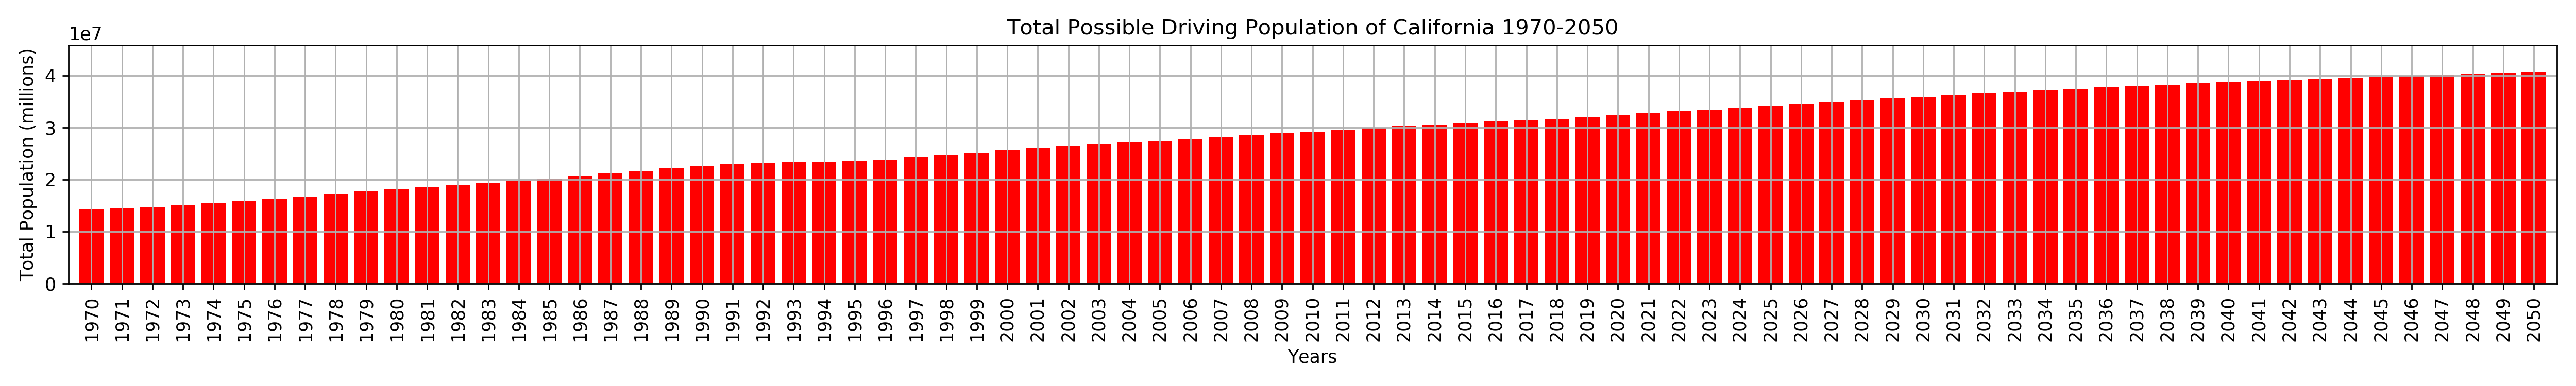

In [7]:
# Create a bar graph to show the total population of each year
# First make a grouped dataframe that is grouped by year
grouped_pop = population_df.groupby(['Year'])

grouped_total_pop = grouped_pop['Total Pop'].sum()

# Reset the index
population_pd = grouped_total_pop.reset_index()

# Make a bar graph
x_axis = np.arange(len(population_pd))

plt.figure(figsize=(20,3))
plt.bar(x_axis, population_pd['Total Pop'], color='r')

# Create labels, ticks, and limits for the graph
# Create the ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, population_pd['Year'], rotation="vertical")

# Set the limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(population_pd['Total Pop'])+5000000)

# Label the graph
plt.title("Total Possible Driving Population of California 1970-2050")
plt.xlabel("Years")
plt.ylabel("Total Population (millions)")

plt.grid(True)

plt.tight_layout()

# Save the figure
plt.savefig("../Images/Total_Possible_Driving_Population_of_California.png")

<IPython.core.display.Javascript object>


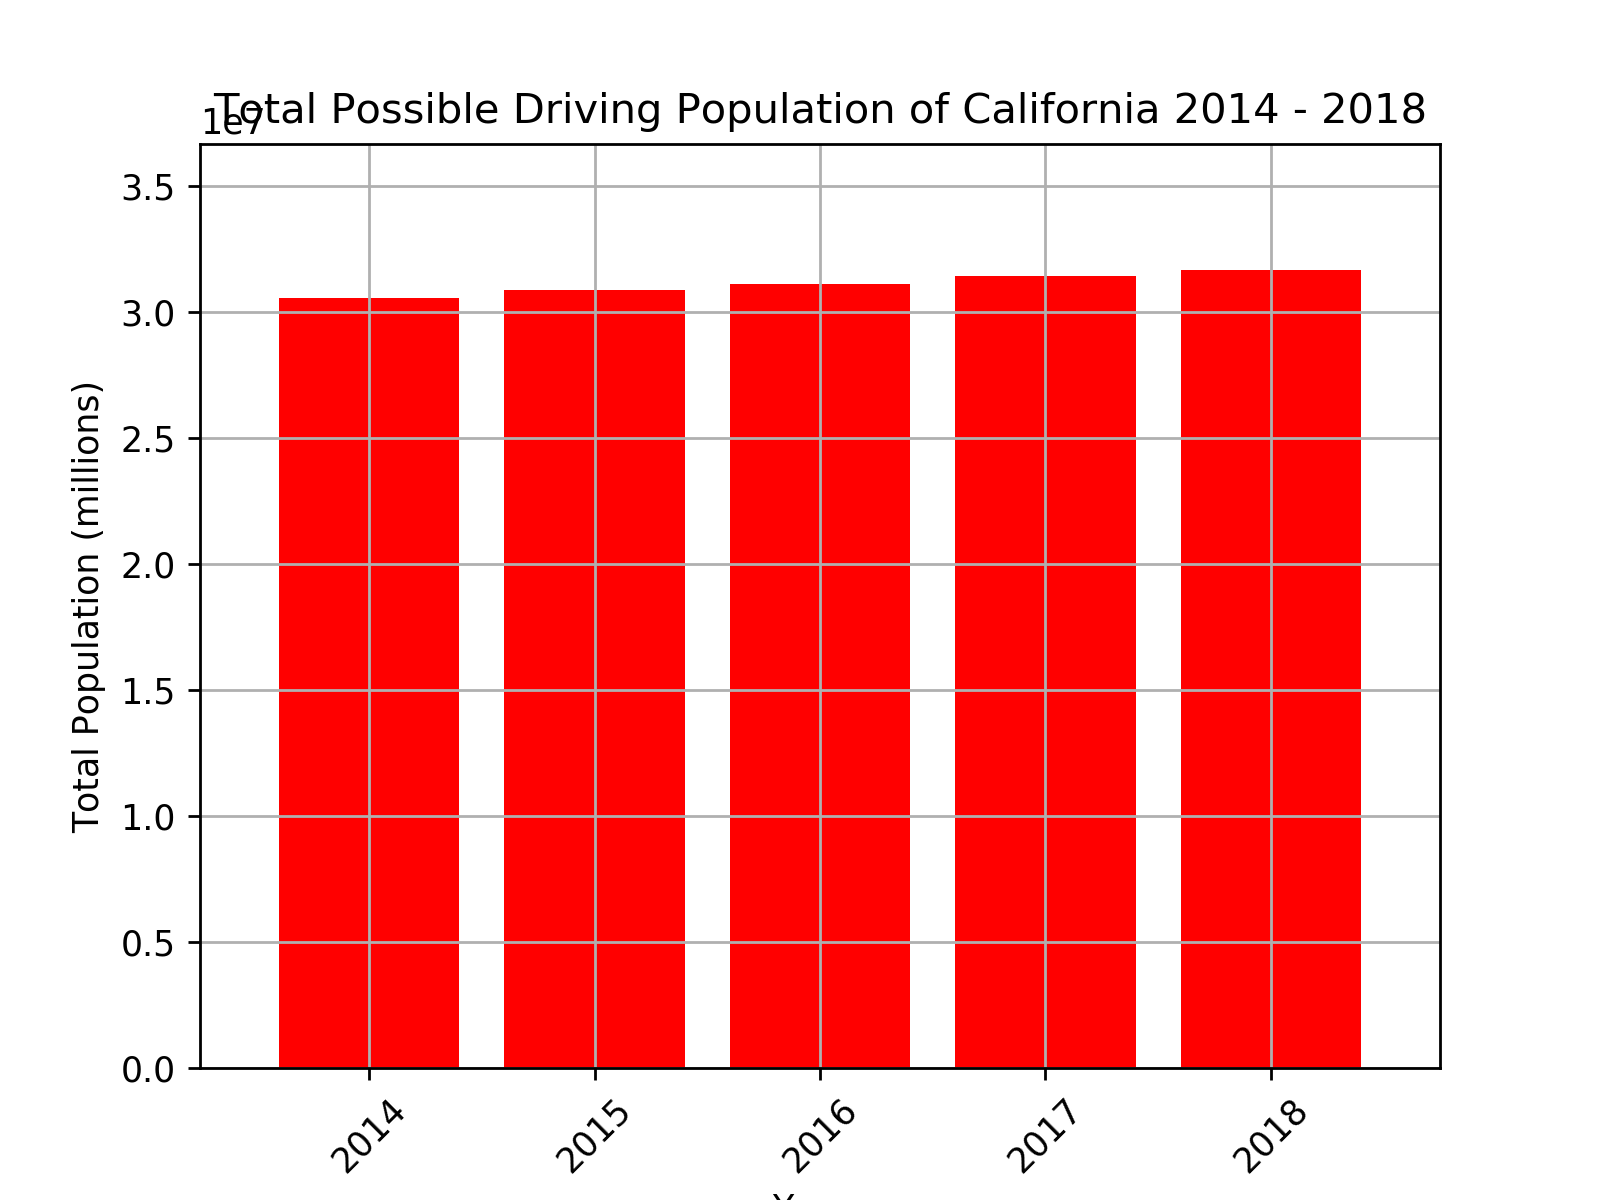

In [8]:
# Make a bar graph
# Note: indicies for the years 2014-2018 are 44-49
plt.figure()
decade_pop = [population_pd['Total Pop'][i] for i in range(44, 49)]

x_axis = np.arange(len(decade_pop))

plt.bar(x_axis, decade_pop, color='r')

# Create labels, ticks, and limits for the graph
# Create the ticks
labels = [population_pd['Year'][i] for i in range(44, 49)]
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels, rotation=45)

# Set the limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(decade_pop)+5000000)

# Label the graph
plt.title("Total Possible Driving Population of California 2014 - 2018")
plt.xlabel("Years")
plt.ylabel("Total Population (millions)")

plt.grid(True)

# Save the figure
plt.savefig("../Images/Total_Possible_Driving_Population_2014_to_2018.png")

# Now Use Data from online PDF for licensed Drivers in California from 2014 to 2018

In [9]:
# Link to where I got the data for licensed drivers in California between 2014-2018
# https://www.dmv.ca.gov/portal/wcm/connect/90a04dc3-ac0d-4528-a6a3-4797d0842689/dl_outs_by_county.pdf?MOD=AJPERES&CVID=
# Create a list for the total # of California drivers and the years
drivers = [25014468, 25914851, 26484646, 26957875, 27136792]
year = [2014, 2015, 2016, 2017, 2018]

# Create a dataframe to put the two lists together
cali_drivers = pd.DataFrame({"Year": year,
                            "Population of Drivers": drivers})

In [10]:
# Grab the driving population for a linear regression
dp_year = cali_drivers['Year']
cali_drivers_data = cali_drivers['Population of Drivers']
dp_slope, dp_int, dp_r, dp_p, dp_std_err = stats.linregress(dp_year, cali_drivers_data)
dp_fit = dp_slope * dp_year + dp_int

<IPython.core.display.Javascript object>


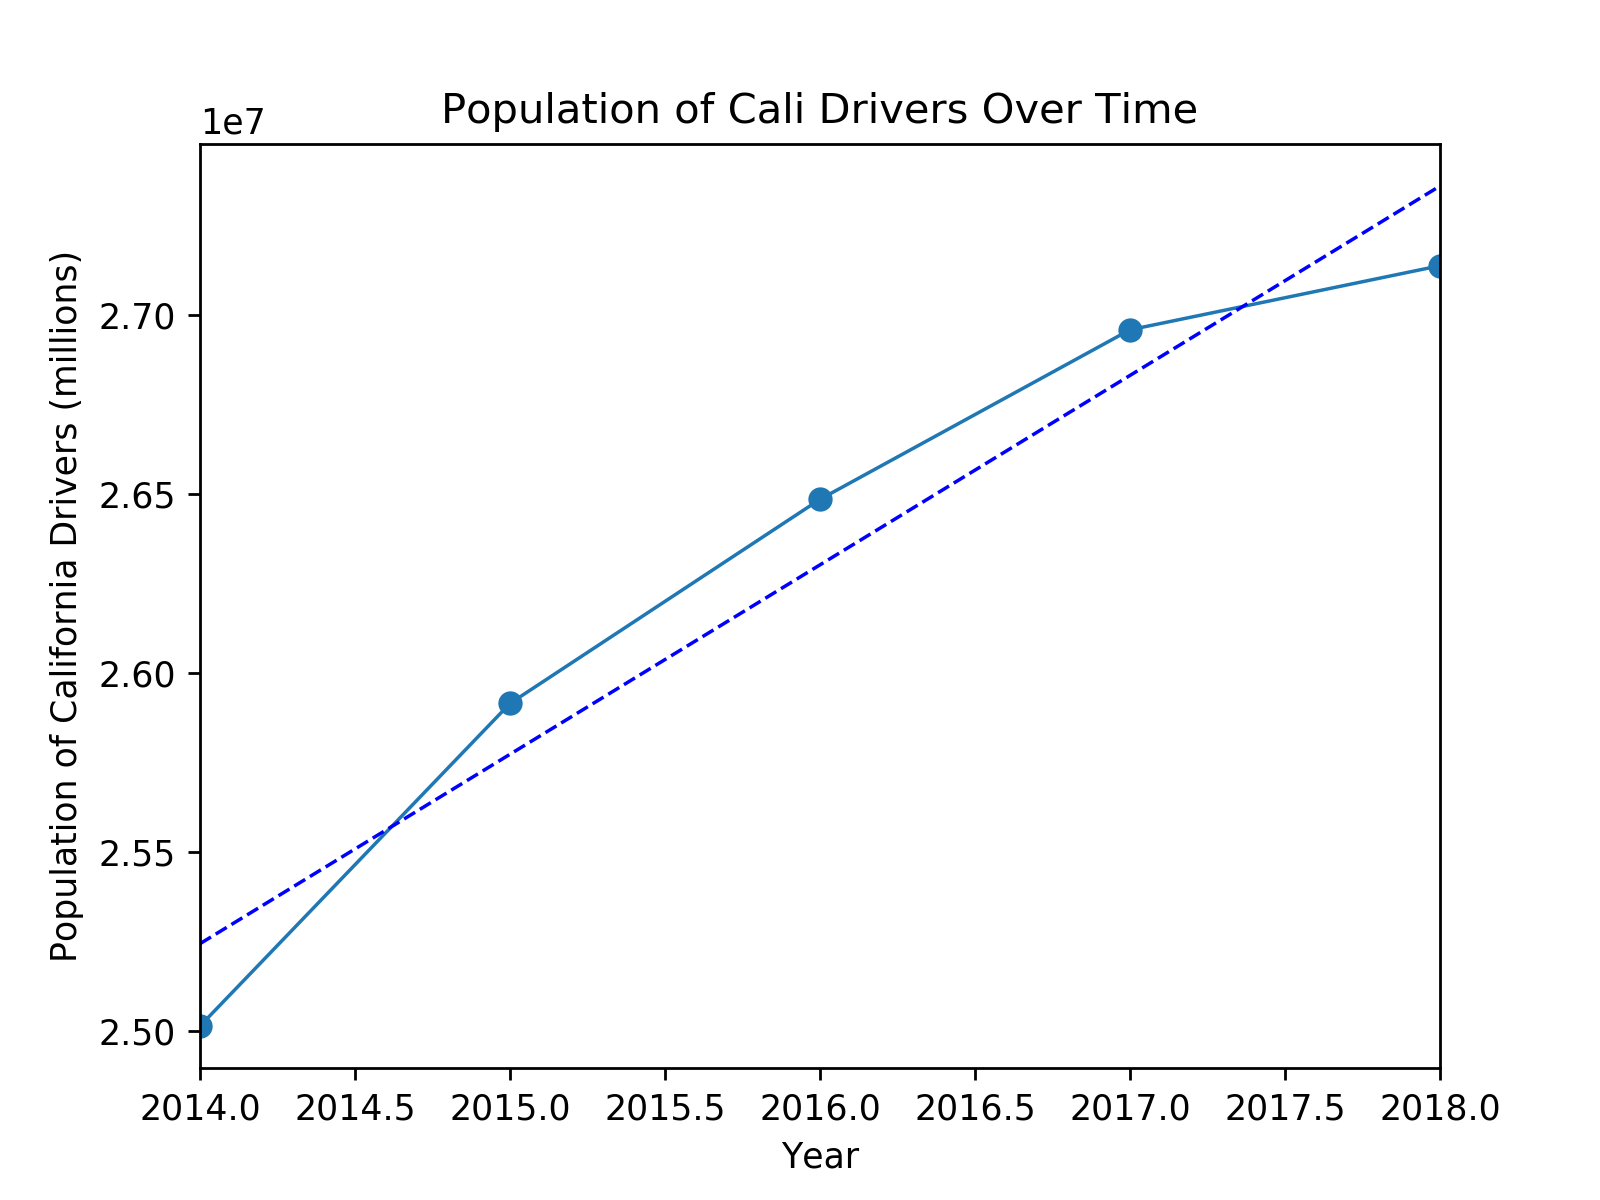

Text(0.5, 1.0, 'Population of Cali Drivers Over Time')

In [11]:
# Plot the data
fig, ax = plt.subplots()
ax.set_xlim(min(dp_year), max(dp_year))
ax.plot(dp_year, cali_drivers_data, linewidth=1, marker="o")
ax.plot(dp_year, dp_fit, "b--", linewidth=1)
ax.set_ylabel("Population of California Drivers (millions)")
ax.set_xlabel("Year")
plt.title("Population of Cali Drivers Over Time")

In [12]:
# Do a linear regression to find the next 5 years of driving population
year = [2019, 2020, 2021, 2022, 2023, 2024]
print(f"The number of California drivers in the year {year[0]} will be {dp_slope * year[0] + dp_int}.")
print(f"The number of California drivers in the year {year[1]} will be {dp_slope * year[1] + dp_int}.")
print(f"The number of California drivers in the year {year[2]} will be {dp_slope * year[2] + dp_int}.")
print(f"The number of California drivers in the year {year[3]} will be {dp_slope * year[3] + dp_int}.")
print(f"The number of California drivers in the year {year[4]} will be {dp_slope * year[4] + dp_int}.")
print(f"The number of California drivers in the year {year[5]} will be {dp_slope * year[5] + dp_int}.")
plt.savefig("../Images/Linear_Regression_of_Cali_Drivers.png")

The number of California drivers in the year 2019 will be 27888028.0.
The number of California drivers in the year 2020 will be 28416795.19999993.
The number of California drivers in the year 2021 will be 28945562.399999976.
The number of California drivers in the year 2022 will be 29474329.599999905.
The number of California drivers in the year 2023 will be 30003096.799999952.
The number of California drivers in the year 2024 will be 30531864.0.


# Sort the registered vehicals by fuel type and compare it to the population and driving population

In [13]:
# Import the October registered vehical CSV file
registered_cars = pd.read_csv("../Resources/CA DMV Car Registration Oct 2018.csv")

# Display the dataframe
registered_cars.head()

,Date,ZIP,Model Year,Fuel,Make,Duty,Vehicles
0,10/1/2018,90000,2006,Gasoline,OTHER/UNK,Light,1.0
1,10/1/2018,90000,2014,Gasoline,OTHER/UNK,Light,1.0
2,10/1/2018,90000,2016,Gasoline,OTHER/UNK,Light,1.0
3,10/1/2018,90000,2017,Gasoline,OTHER/UNK,Light,1.0
4,10/1/2018,90000,<2006,Diesel and Diesel Hybrid,OTHER/UNK,Heavy,55.0


In [14]:
# Groupby fuel
grouped_fuel = registered_cars.groupby(['Fuel'])
grouped_fuel.sum()

,ZIP,Vehicles
Fuel,,
Battery Electric,414873359,61307.0
Diesel and Diesel Hybrid,1355814863,250303.0
Flex-Fuel,1315983915,303171.0
Gasoline,9053134702,7834566.0
Hybrid Gasoline,1126137679,335440.0
Hydrogen Fuel Cell,51165566,1979.0
Natural Gas,213250476,15644.0
Other,42550811,2440.0
Plug-in Hybrid,404212601,67481.0


In [15]:
# Create lists that groups the fuel types into 4 categories
# Add the number of vehicals in each category
# Gas consists of Gasoline and Flex-Fuel
# Electric consists of Battery Electric and Hydrogen Fuel Cells
# Hybrid consists of Diesel & Diesel Hybrid, Hybrid Gasoline, and Plug-in Hybrid
# Other consists of other and Natural Gas
fuel = ["Gas", "Electric", "Hybrid", "Other"]
num_cars = [8137737, 63286, 653224, 18084]

# Create a list of colors for the pie chart
colors = ["blue", "yellow", "red", "green"]

# separate the largest piece of the pie
explode = [0.1, 0, 0, 0]

<IPython.core.display.Javascript object>


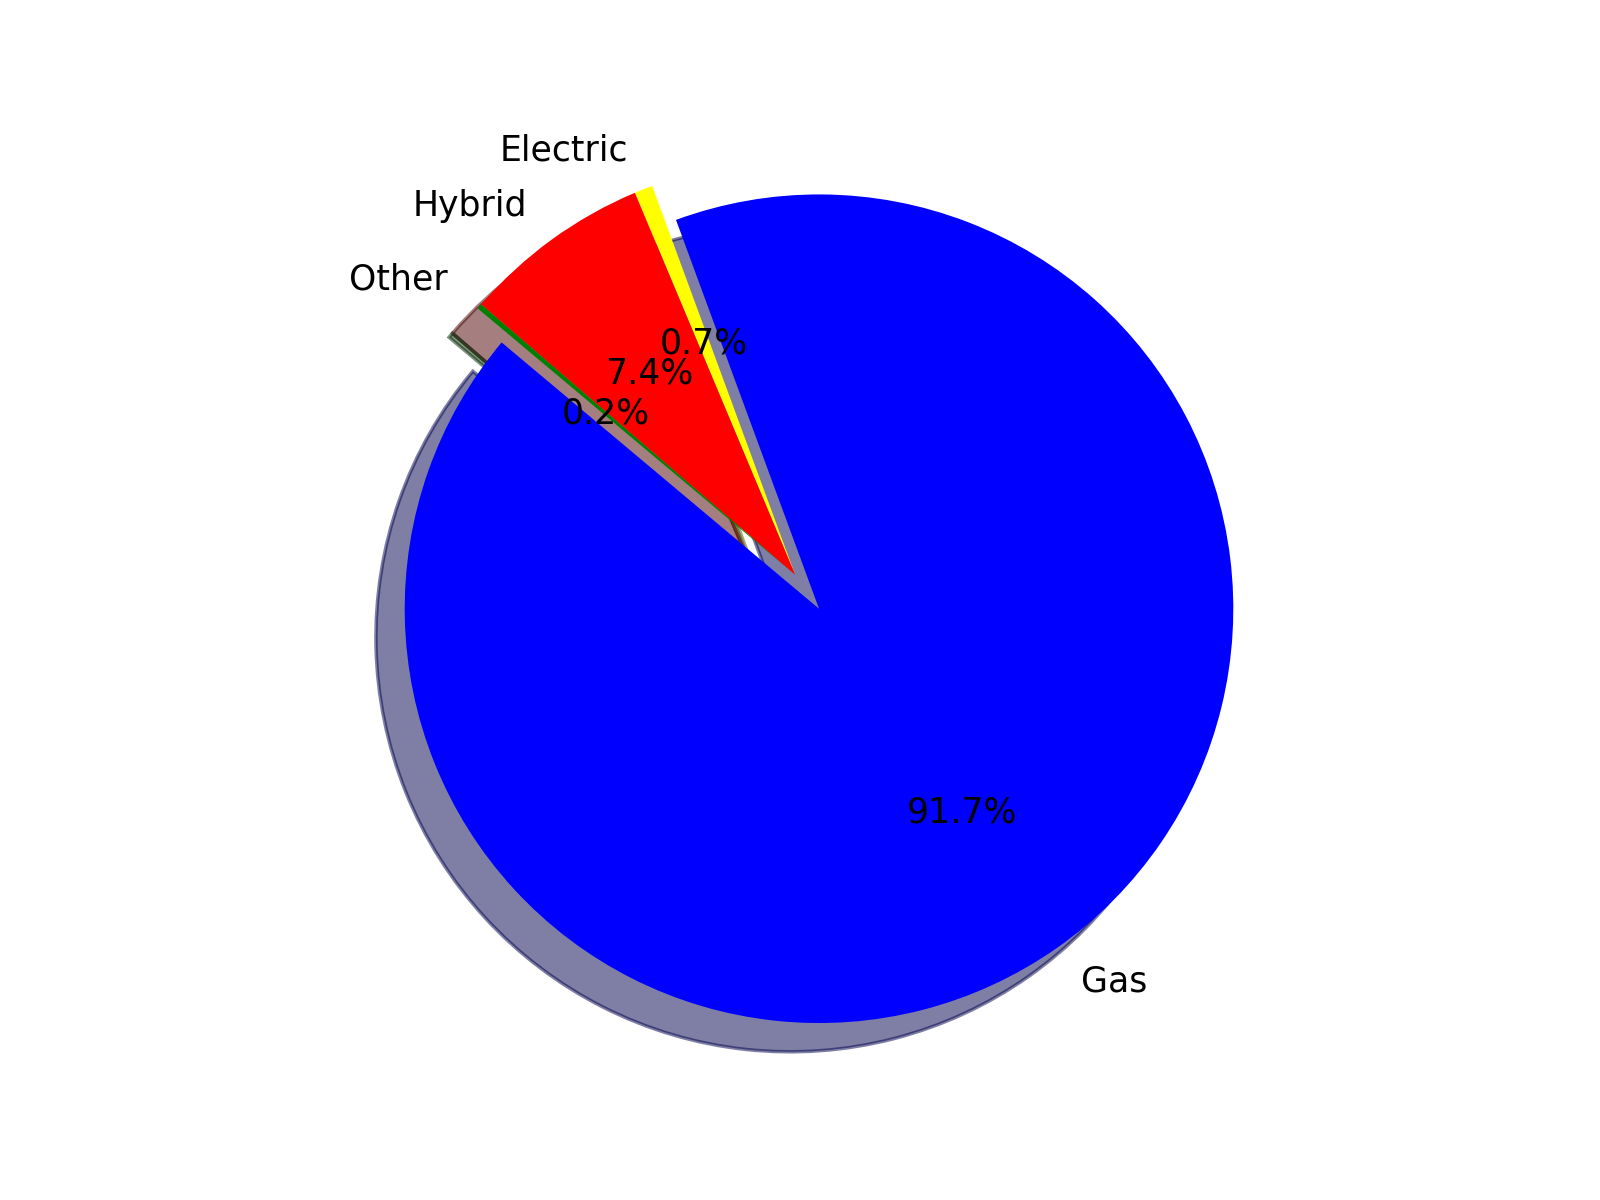

<function matplotlib.pyplot.show(*args, **kw)>

In [16]:
# Create a pie chart and save the image
plt.figure()
plt.pie(num_cars, explode=explode, labels=fuel, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Make sure axes are equal
plt.axis("equal")

# Save the figure
plt.savefig("../Images/Fuel_Types_in_California.png")
plt.show

# Now lets look at the data for car mpg vs electric car range

In [17]:
# Import the electric car data
ec_data = pd.read_csv("../Resources/Electric_Car_Range_Data.csv")
ec_data.head()

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,2013,Nissan,Leaf,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle,75
1,2019,Tesla,Model 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle,220
2,2019,Tesla,Model 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle,220
3,2016,Nissan,Leaf,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle,84
4,2016,Kia,Soul,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle,93


In [18]:
# Sort the data by highest range
ec_range = ec_data.sort_values(["Electric Range"], ascending=False)
ec_range.head()

,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
2984,2019,Tesla,Model X,Battery Electric Vehicle (BEV),Non-Clean Alternative Fuel Vehicle,289
28770,2019,Tesla,Model X,Battery Electric Vehicle (BEV),Non-Clean Alternative Fuel Vehicle,289
13972,2019,Tesla,Model X,Battery Electric Vehicle (BEV),Non-Clean Alternative Fuel Vehicle,289
12249,2019,Tesla,Model X,Battery Electric Vehicle (BEV),Non-Clean Alternative Fuel Vehicle,289
17440,2019,Tesla,Model X,Battery Electric Vehicle (BEV),Non-Clean Alternative Fuel Vehicle,289


In [19]:
# Drop duplicate rows
highest_range = ec_range.drop_duplicates(keep='first')

# Reset the index
highest_range = highest_range.reset_index()
highest_range.head()

,index,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range
0,2984,2019,Tesla,Model X,Battery Electric Vehicle (BEV),Non-Clean Alternative Fuel Vehicle,289
1,24812,2019,Tesla,Model S,Battery Electric Vehicle (BEV),Non-Clean Alternative Fuel Vehicle,270
2,6130,2012,Tesla,Model S,Battery Electric Vehicle (BEV),Non-Clean Alternative Fuel Vehicle,265
3,38149,2019,Hyundai,Kona Electric,Battery Electric Vehicle (BEV),Undetermined - Base MSRP has not been research...,258
4,46081,2018,Tesla,Model S,Battery Electric Vehicle (BEV),Non-Clean Alternative Fuel Vehicle,249


In [20]:
# Create lists to store the top 5 gas cars in California and their mileage
top_5 = ["Toyota Camry", "Toyota Corolla", "Honda Accord", "Nissan Altima", "Nissan Sentra"]
mileage = [476, 422, 444, 558, 422]

# Create a Dataframe
popular_cars = pd.DataFrame({"Top 5 Cars": top_5,
                            "Mileage": mileage})

# Display the data frame
popular_cars

,Top 5 Cars,Mileage
0,Toyota Camry,476
1,Toyota Corolla,422
2,Honda Accord,444
3,Nissan Altima,558
4,Nissan Sentra,422


In [21]:
# Sort the data by mileage
popular_cars_sorted = popular_cars.sort_values(["Mileage"], ascending=False)
popular_cars_sorted

,Top 5 Cars,Mileage
3,Nissan Altima,558
0,Toyota Camry,476
2,Honda Accord,444
1,Toyota Corolla,422
4,Nissan Sentra,422


In [22]:
# best_range = [highest_range['Electric Range'][i] for i in range(0, 5)]
# Create variables to store the mean range of gas and electric
gas_mean = popular_cars_sorted['Mileage'].mean()
electric_mean = highest_range['Electric Range'].mean()

# Get the mean of each range and store it in a dataframe
range_mean = pd.DataFrame({"Gas Mean": gas_mean,
                          "Electric Mean": electric_mean}, index=range(0, 1))
# Display the Dataframe
range_mean

,Gas Mean,Electric Mean
0,464.4,69.877551


<IPython.core.display.Javascript object>


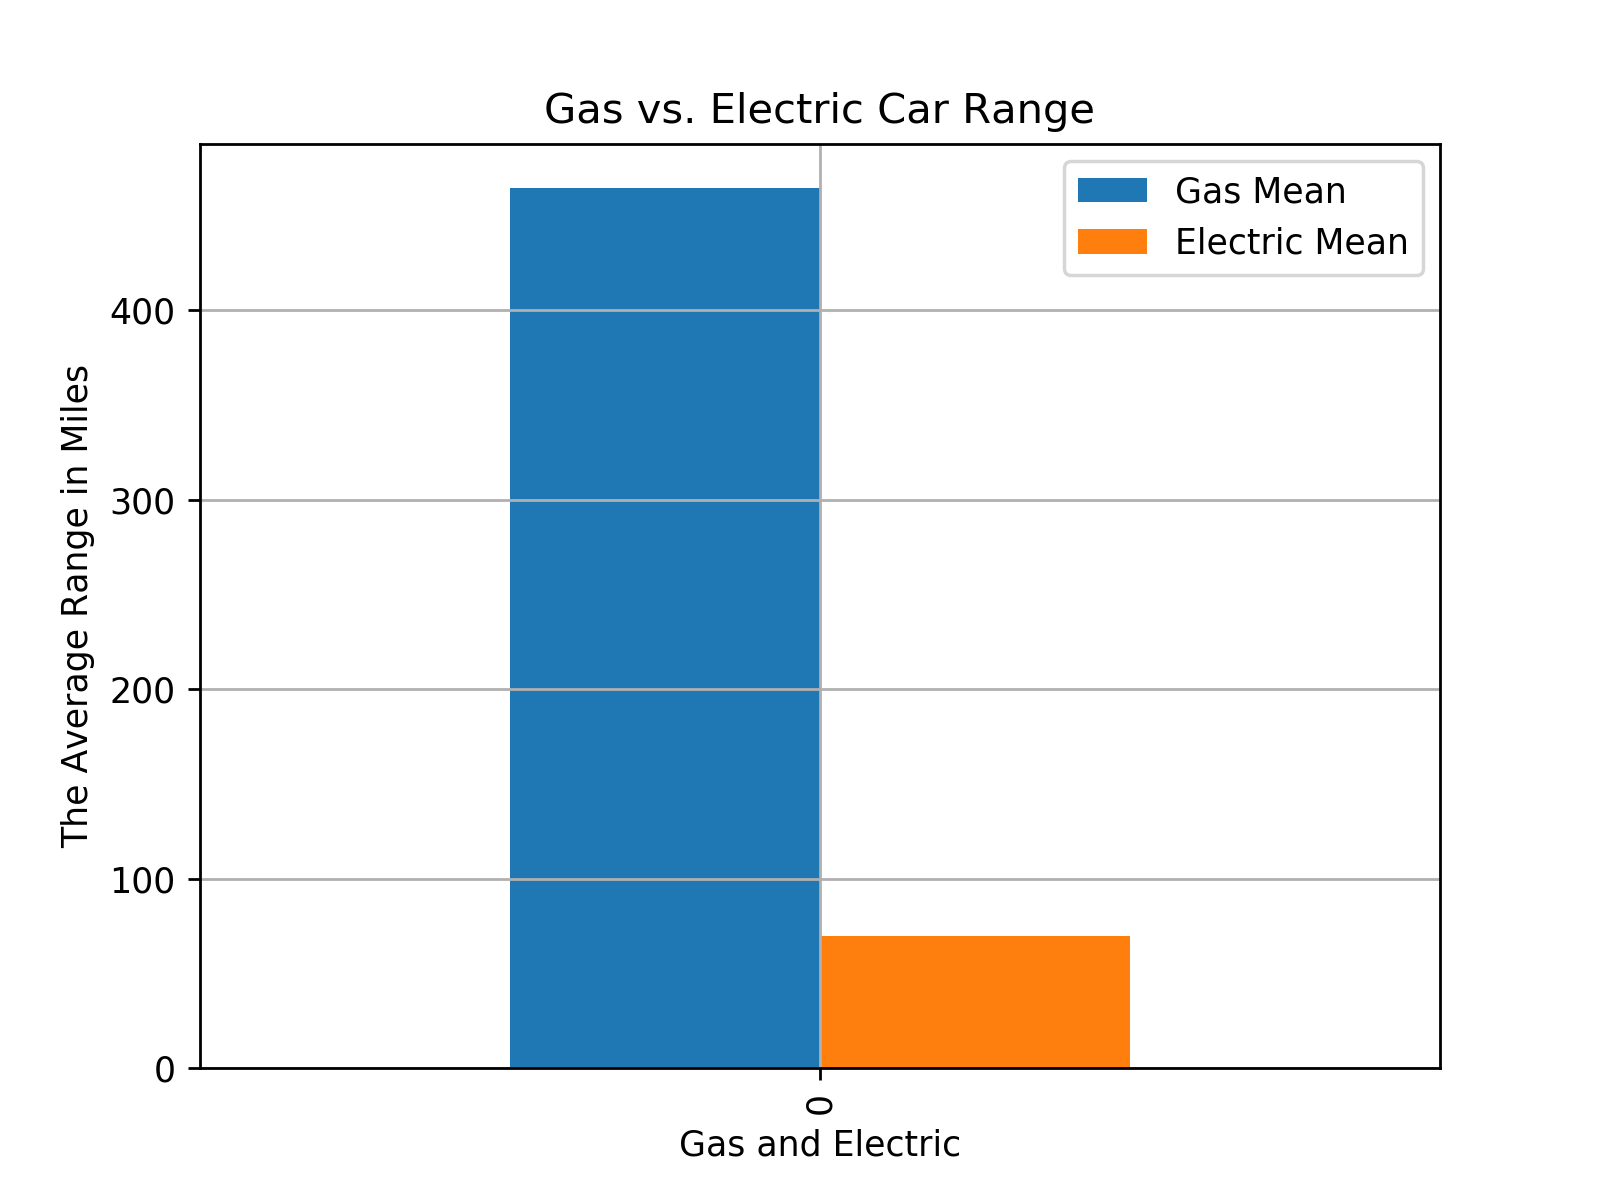

In [24]:
# Plot the data

# Use Pandas to plot multiple columns
multi_plot = range_mean.plot(kind="bar")

#Add in a title and labels
plt.title("Gas vs. Electric Car Range")
plt.xlabel("Gas and Electric")
plt.ylabel("The Average Range in Miles")

# Add grid lines
plt.grid()

# Save the figure
plt.savefig("../Images/Gas_vs_Electric.png")